In [57]:
%load_ext lab_black

import pandas as pd

cols_i = [
    "identifier",
    "modified",
    "references",
    "catalogNumber",
    "individualCount",
    "eventDate",
    "eventTime",
    "locality",
    "decimalLatitude",
    "decimalLongitude",
    "scientificName",
    "higherClassification",
    "taxonKey",
    "speciesKey",
    "genericName",
    "acceptedScientificName",
    "verbatimScientificName",
    "level2Name",
]

## Preprocessing

In [57]:
# Download dataset: https://www.gbif.org/occurrence/download/0097245-200613084148143 (alle data, polygon van breda en omstreken)
# alt link: https://doi.org/10.15468/dl.ub8wrd

# download definities van https://oudeversie.waarneming.nl/download.php?lang=nl&diergroep=0&only_ln=0

,id,name,aantal,levensstadium,activiteit,locatie_id,locatie_name,waarnemer,gps,rds,tags
0,183729792,Fazant,1,onbekend,ter plaatse,/locations/17061/,Etten-Leur - Kelsdonk e.o. (NB),/users/4849/,"51.6033, 4.6310",102615 401871,"[algemeen, exoot]"
1,183722713,Fazant,1,onbekend,alarmerend,/locations/25452/,Breda - Lange Bunders en Slangwijk (NB),/users/3503/,"51.6399, 4.7364",109948 405874,"[algemeen, exoot]"
2,183722595,Fazant,1,onbekend,ter plaatse,/locations/25448/,Breda - Hooijdonk (NB),/users/3503/,"51.6363, 4.7301",109512 405479,"[algemeen, exoot]"
3,183723465,Fazant,1,onbekend,ter plaatse,/locations/19089/,Riel - Riels Laag - zuid (NB),/users/76659/,"51.4962, 5.0130",129013 389757,"[algemeen, exoot]"
4,183716661,Kip (verwilderd),2,onbekend,ter plaatse,/locations/13916/,Breda - Doornbos (NB),/users/191195/,"51.5964, 4.7992",114258 400997,"[vrij algemeen, exoot]"
...,...,...,...,...,...,...,...,...,...,...,...
4484,201668382,Bosuil,1,onbekend,roepend,/locations/134035/,Tilburg - De Blaak (NB),/users/59709/,"51.5482, 5.0373",130733 395527,"[vrij algemeen, inheems]"
4485,201621010,IJsvogel,1,onbekend,ter plaatse,/locations/2311/,Oudenbosch (NB),/users/129274/,"51.5867, 4.5172",94706 400119,"[vrij algemeen, inheems]"
4486,201637801,Grote Bonte Specht,1,onbekend,ter plaatse,/locations/25452/,Breda - Lange Bunders en Slangwijk (NB),/users/5547/,"51.6346, 4.7521",111035 405280,"[algemeen, inheems]"
4487,201656328,Grote Bonte Specht,1,onbekend,ter plaatse,/locations/17479/,Breda - 't Hout (NB),/users/17293/,"51.5600, 4.7532",111039 396977,"[algemeen, inheems]"


In [8]:
# preprocessing, heeft veel memory nodig
df = pd.read_csv('/home/simon/Downloads/occurrence.txt', sep='\t')


/home/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2,9,13,26,35,39,42,46,47,54,56,57,58,59,60,62,64,65,66,67,68,69,70,73,74,75,76,77,78,80,81,82,83,84,85,86,87,88,92,93,95,96,97,99,105,106,107,108,110,111,112,113,115,116,117,120,121,122,123,124,125,126,130,131,137,138,139,140,142,144,145,146,147,157,161,167,168,169,170,171,172,173,174,175,181,183,184,185,186,189,198,200,201,202,205,216,237,239,240) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
# kijken welke cols interessant zijn
i=24
cols = df.columns
df[cols[(i*10):(i+1)*10]].iloc[:10]

,identifiedByID,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name
0,NaN,NLD,Netherlands,NLD.8_1,Noord-Brabant,NLD.8.14_1,Breda,NaN,NaN
1,NaN,NLD,Netherlands,NLD.8_1,Noord-Brabant,NLD.8.22_1,Etten-Leur,NaN,NaN
2,NaN,NLD,Netherlands,NLD.8_1,Noord-Brabant,NLD.8.22_1,Etten-Leur,NaN,NaN
3,NaN,NLD,Netherlands,NLD.8_1,Noord-Brabant,NLD.8.69_1,Zundert,NaN,NaN
4,NaN,NLD,Netherlands,NLD.8_1,Noord-Brabant,NLD.8.14_1,Breda,NaN,NaN
5,NaN,NLD,Netherlands,NLD.8_1,Noord-Brabant,NLD.8.14_1,Breda,NaN,NaN
6,NaN,NLD,Netherlands,NLD.8_1,Noord-Brabant,NLD.8.14_1,Breda,NaN,NaN
7,NaN,NLD,Netherlands,NLD.8_1,Noord-Brabant,NLD.8.14_1,Breda,NaN,NaN
8,NaN,NLD,Netherlands,NLD.8_1,Noord-Brabant,NLD.8.14_1,Breda,NaN,NaN
9,NaN,NLD,Netherlands,NLD.8_1,Noord-Brabant,NLD.8.14_1,Breda,NaN,NaN


In [17]:
df[cols_i].to_hdf('/data/projects/hackaton-2020/observations.hdf', 'key')

/home/opt/anaconda/lib/python3.8/site-packages/pandas/core/generic.py:2490: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['identifier', 'modified', 'references', 'catalogNumber', 'eventDate',
       'eventTime', 'locality', 'scientificName', 'higherClassification',
       'genericName', 'acceptedScientificName', 'verbatimScientificName',
       'level2Name'],
      dtype='object')]

  pytables.to_hdf(


In [19]:
df = pd.read_hdf('/data/projects/hackaton-2020/observations.hdf', 'key')

In [46]:
df = df[~pd.isna(df.eventDate)]
df = df[df.eventDate.str.slice(0,4).astype(int) > 1950]

In [48]:
df['event_date'] = pd.to_datetime([t.split('T')[0] for t in df.eventDate])
df['year'] = df.eventDate.str.slice(0,4).astype(int)

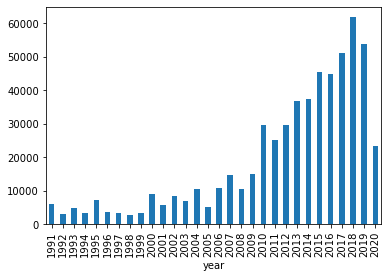

In [51]:
df.groupby(df.year).count().identifier.plot.bar()

In [41]:
df.event_date.dtype

dtype('<M8[ns]')